In [317]:
import pandas as pd
import numpy as np
import OpenBlender
import json
pn.extension('plotly')
from matplotlib import pyplot as plt

import seaborn as sns
import panel as pn
import hvplot.pandas
import pandas as pd
from dotenv import load_dotenv
import warnings
import plotly.graph_objs as go
import seaborn as sns
import holoviews as hv
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from PIL import Image


Shape before removing same tweets (1884126, 9)
Shape after removing samee tweets:  (1861016, 9)
Number of tweets removed:  23110
Shape before removing same prices:  (12618, 7)
Shape after removing same prices:  (12479, 7)
Number of values removed:  139


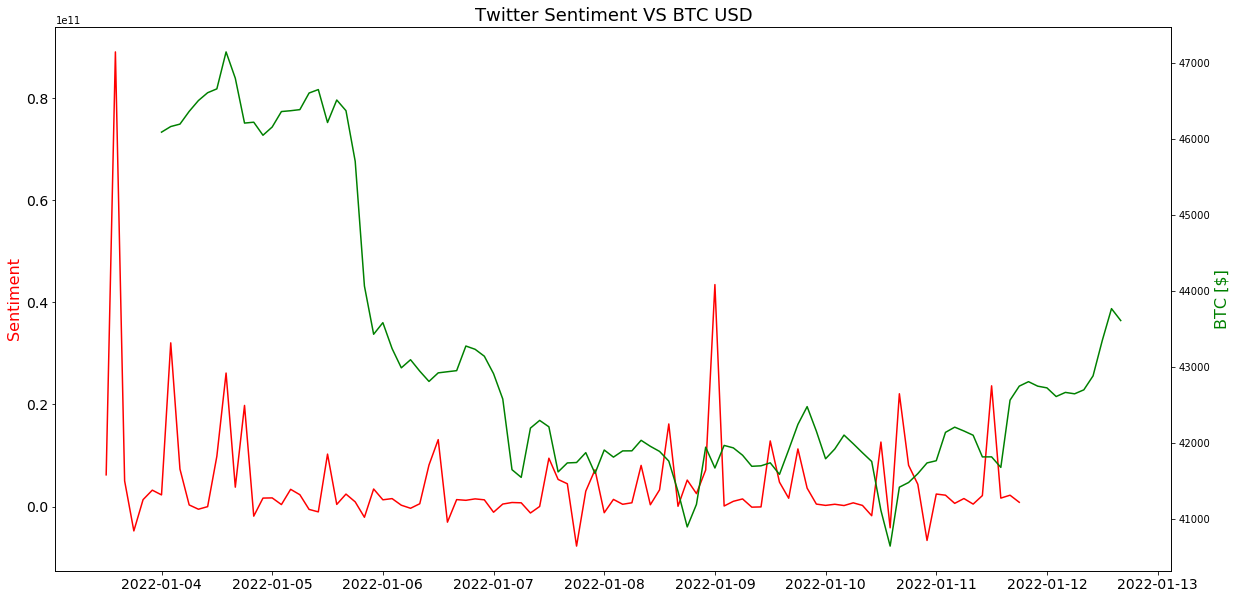

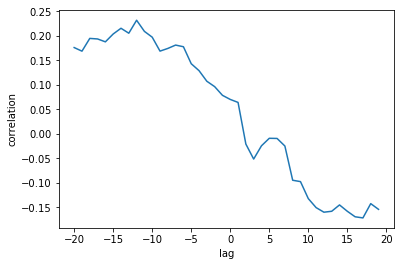

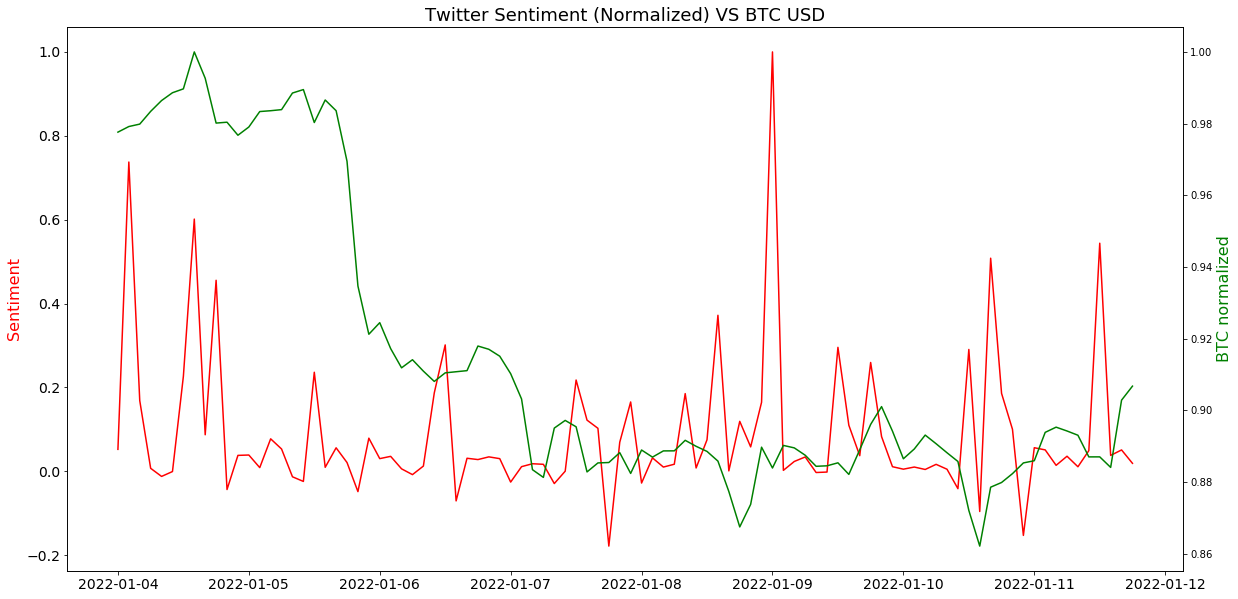

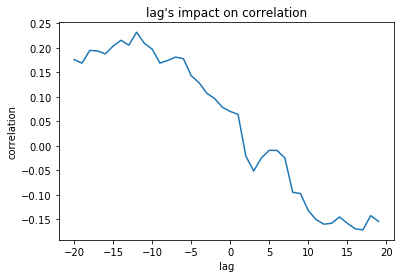

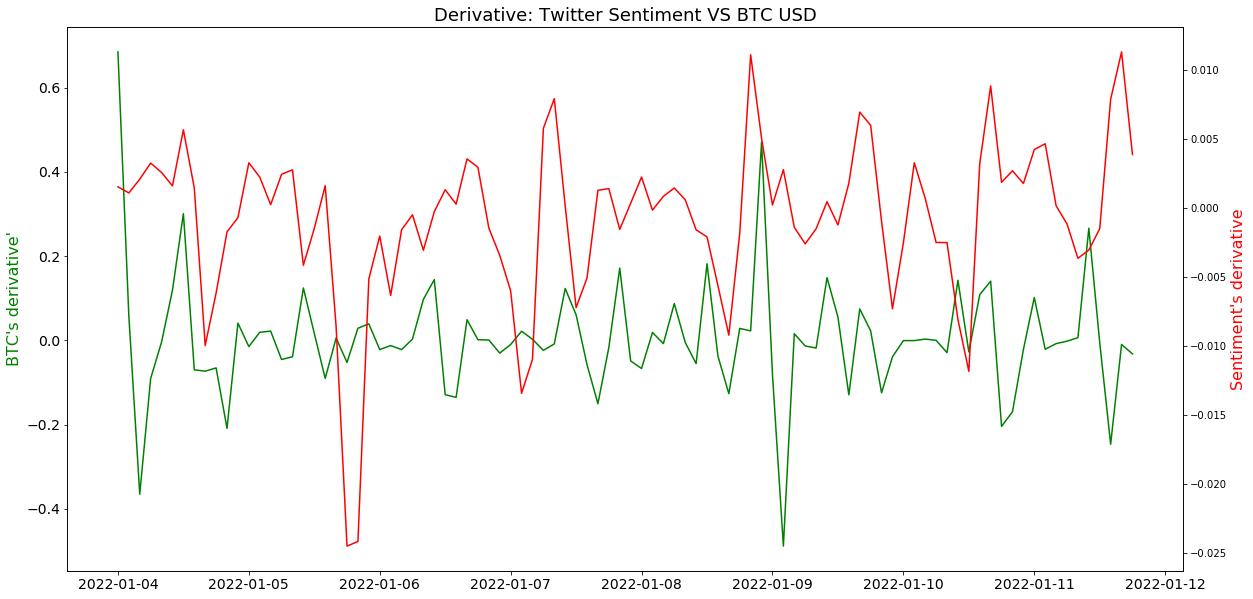

In [318]:
%run antonio_analysis.ipynb

In [377]:
def openBlender_plot():
    data = pd.read_csv('data/input_data.csv')
    plt.subplots(figsize=(10,6))
    target_data = data.copy()
    target_data["target"]=target_data["target"].astype(str)
    plot=sns.histplot(data=target_data,x="target",hue="target",palette=["#d1120f","#006400"],legend="target")
    plt.title("Count of Target Labels")
    plt.legend(title='Label', loc='upper right', labels=['Rise', 'Fall'])
    return figure

def OpenBlender_test():
    image = Image.open(r"../images/count_target_labels.png") 
    return image

def Google_Trends():
    image = Image.open(r"../images/google_trends.png") 
    return image

def Sentiment_Analysis():
    image = Image.open(r"../images/sentiment-analysis.jpeg")
    return image

In [381]:
def GoogleTrends_tt_plot():
    history = pd.read_csv('data/gt_history.csv')
    plt.plot(history['loss'], label='train')
    plt.plot(history['val_loss'], label='test')
    plt.title("Test and Train set Loss Value Rate")
    plt.xlabel('Epochs Number', fontsize=12)
    plt.ylabel('Loss Value', fontsize=12)
    plt.legend()
    plt.savefig('../images/gt_tt_plot.png')
    image = Image.open(r"../images/gt_tt_plot.png")
    return image
    


In [392]:
def GoogleTrends_pred_plot():
    fig = plt.figure()
    train_size=70
    actual = pd.read_csv('data/gt_actual.csv')
    final = pd.read_csv('data/gt_final.csv')
    plt.plot(actual.BTC_USD, 'b', label='Original Set')
    plt.plot(final.BTC_USD[0:train_size], 'r' , label='Training set')
    plt.plot(final.BTC_USD[train_size:], 'g' , label='Predicted/Test set')
    plt.title("Bitcoin Predicted Prices")
    plt.ylabel('BitCoin Price Trend', fontsize=12)
    plt.legend(loc='best')
    plt.savefig("../images/gt_pred.png")
    image = Image.open(r"../images/gt_pred.png")
    return image

    

In [358]:
def TwitterSentimentVBTC():
    fig, ax1 = plt.subplots(figsize=(12,6))
    ax1.set_title(f"Twitter Sentiment VS {symbol} USD", fontsize=18)
    ax1.tick_params(labelsize=14)
    ax2 = ax1.twinx()
    ax1.plot_date(tweets_grouped.index, tweets_grouped, 'r-')
    ax2.plot_date(crypto_usd_grouped.index, crypto_usd_grouped, 'g-')

    ax1.set_ylabel("Sentiment", color='r', fontsize=16)
    ax2.set_ylabel(f"{symbol} [$]", color='g', fontsize=16)
    return fig


ValueError: PNG pane does not support objects of type 'Figure'.

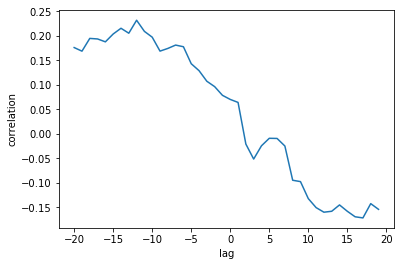

<Figure size 864x432 with 0 Axes>

In [359]:
def TwitterSentimentVBTC_corr():
    xcov = [crosscorr(tweets_grouped, crypto_usd_grouped, lag = i) for i in range(-20,20)]
    plt.plot(range(-20,20), xcov)
    plt.xlabel("lag")
    plt.ylabel("correlation")
    fig = plt.figure(figsize=(12,6))
    
    test_png = pn.pane.PNG(fig)
    return test_png

TwitterSentimentVBTC_corr()

In [361]:
# Create a Title for the Dashboard

title = pn.pane.Markdown("""
## Crypto Sentiment
""")

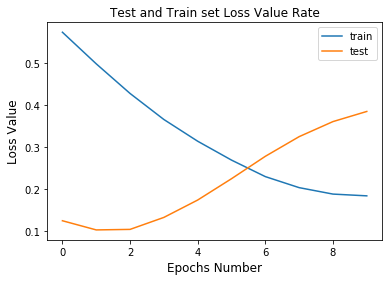

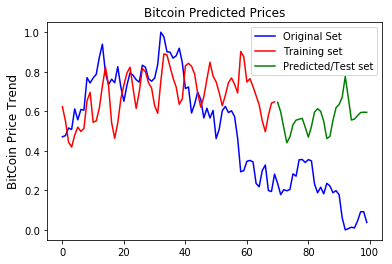

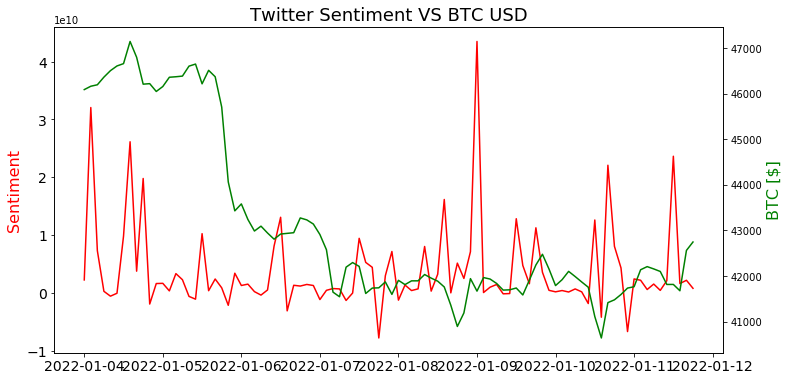

In [393]:
tabs = pn.Tabs(
    ("OpenBlender", pn.Column(OpenBlender_test)),
    ("Sentiment Analysis", pn.Column(Sentiment_Analysis)),
    ("Google Trends Test&Train", pn.Column(GoogleTrends_tt_plot)),
    ("Google Trends Predictions", pn.Column(GoogleTrends_pred_plot)),
    ("Google Trends Hits vs. BTC", pn.Column(Google_Trends)),
    ("Twitter Sentiment vs. BTC", pn.Column(TwitterSentimentVBTC)),
    #("Twitter Sentiment vs. BTC Corr"), pn. Column(TwitterSentimentVBTC_corr)
    )


In [394]:
dashboard = pn.Column(title, tabs)
#pn.extension()


Column
    [0] Markdown(str)
    [1] Tabs
        [0] Column
            [0] Column
                [0] Column()
                [1] Row
                    [0] PNG(PngImageFile, name='interactive03704')
        [1] Column
            [0] Column
                [0] Column()
                [1] Row
                    [0] PNG(JpegImageFile, name='interactive03711')
        [2] Column
            [0] Column
                [0] Column()
                [1] Row
                    [0] PNG(PngImageFile, name='interactive03718')
        [3] Column
            [0] Column
                [0] Column()
                [1] Row
                    [0] PNG(PngImageFile, name='interactive03725')
        [4] Column
            [0] Column
                [0] Column()
                [1] Row
                    [0] PNG(PngImageFile, name='interactive03732')
        [5] Column
            [0] Column
                [0] Column()
                [1] Row
                    [0] Matplotlib(Figure, name='interactive03739')
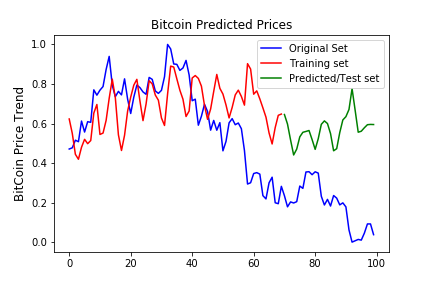
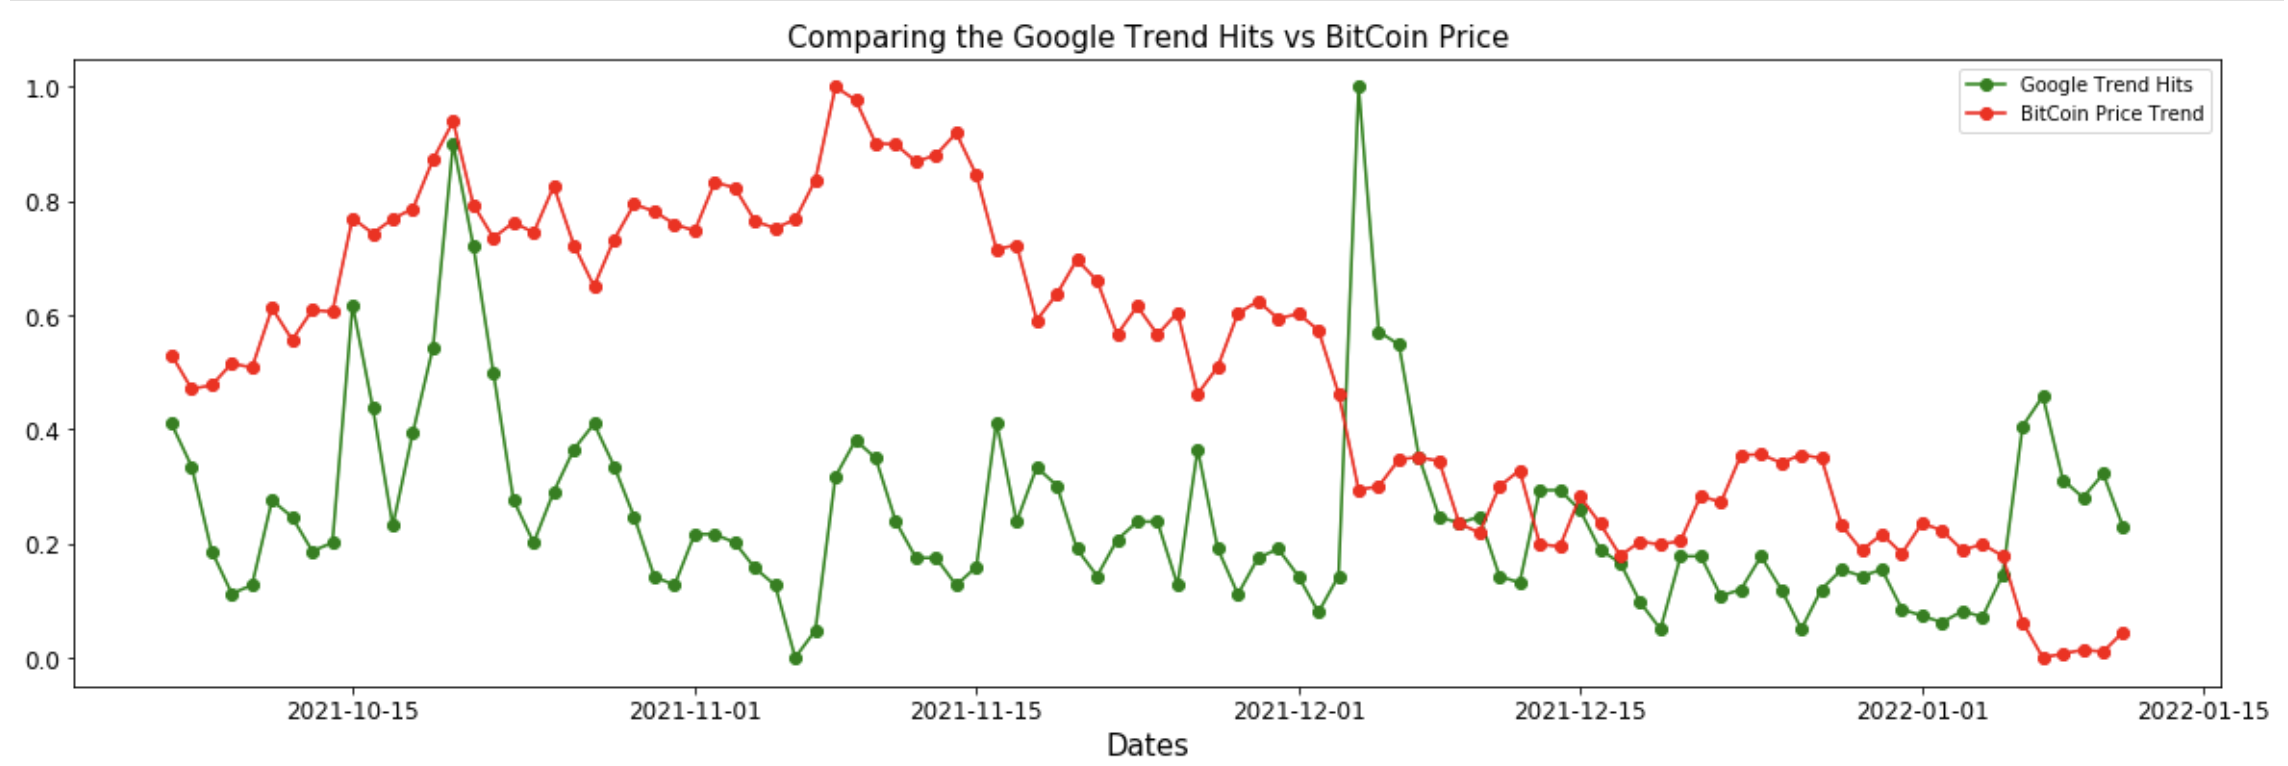
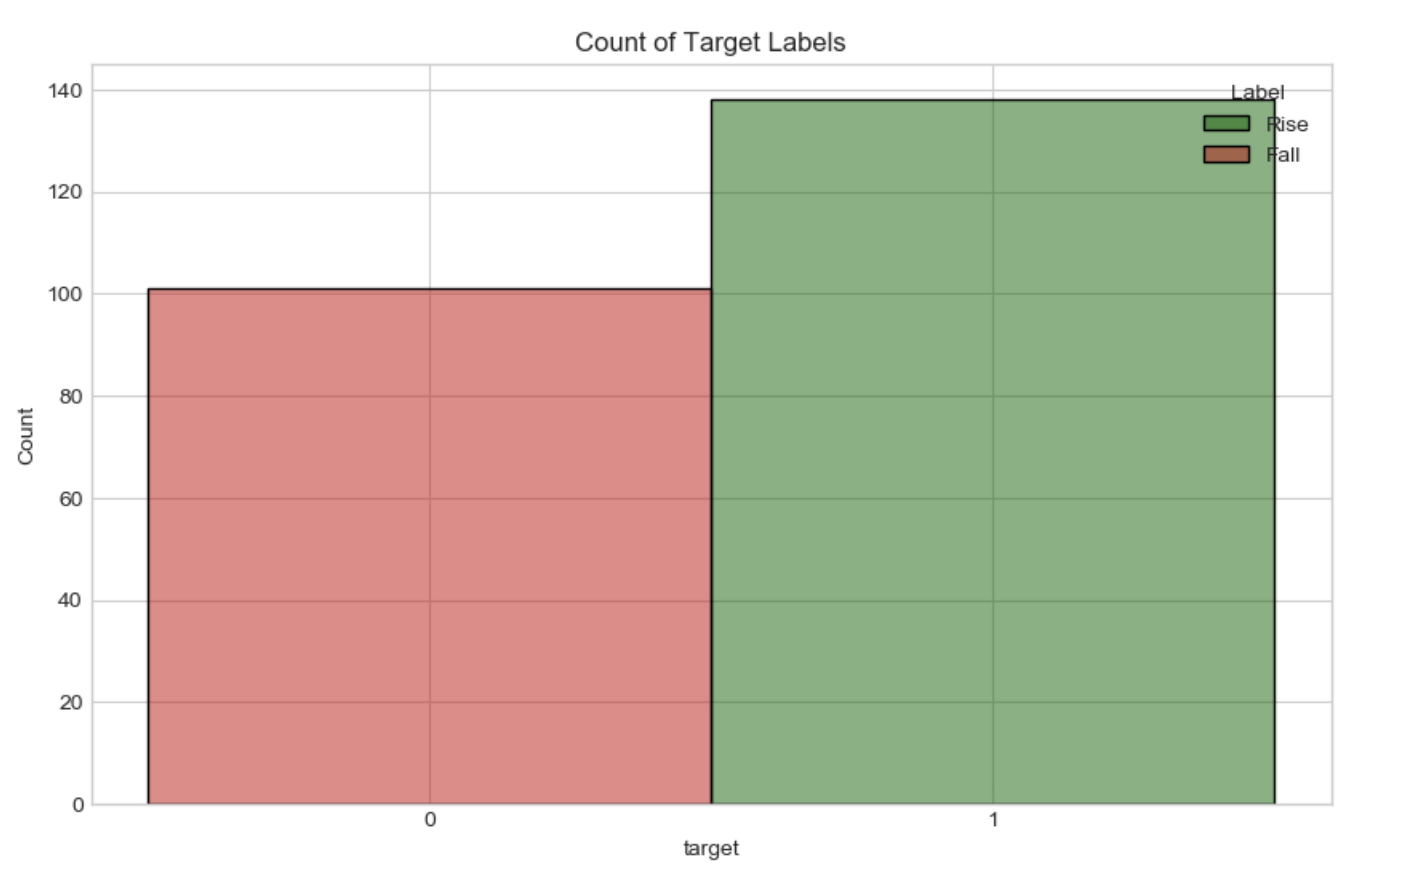
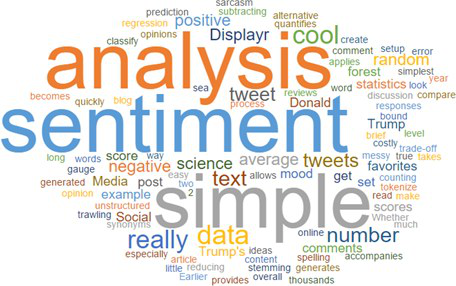
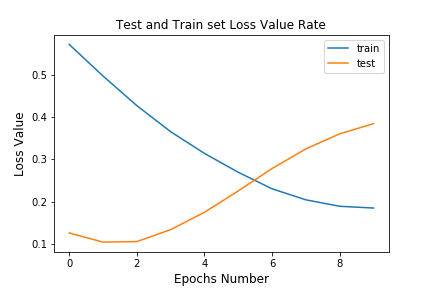
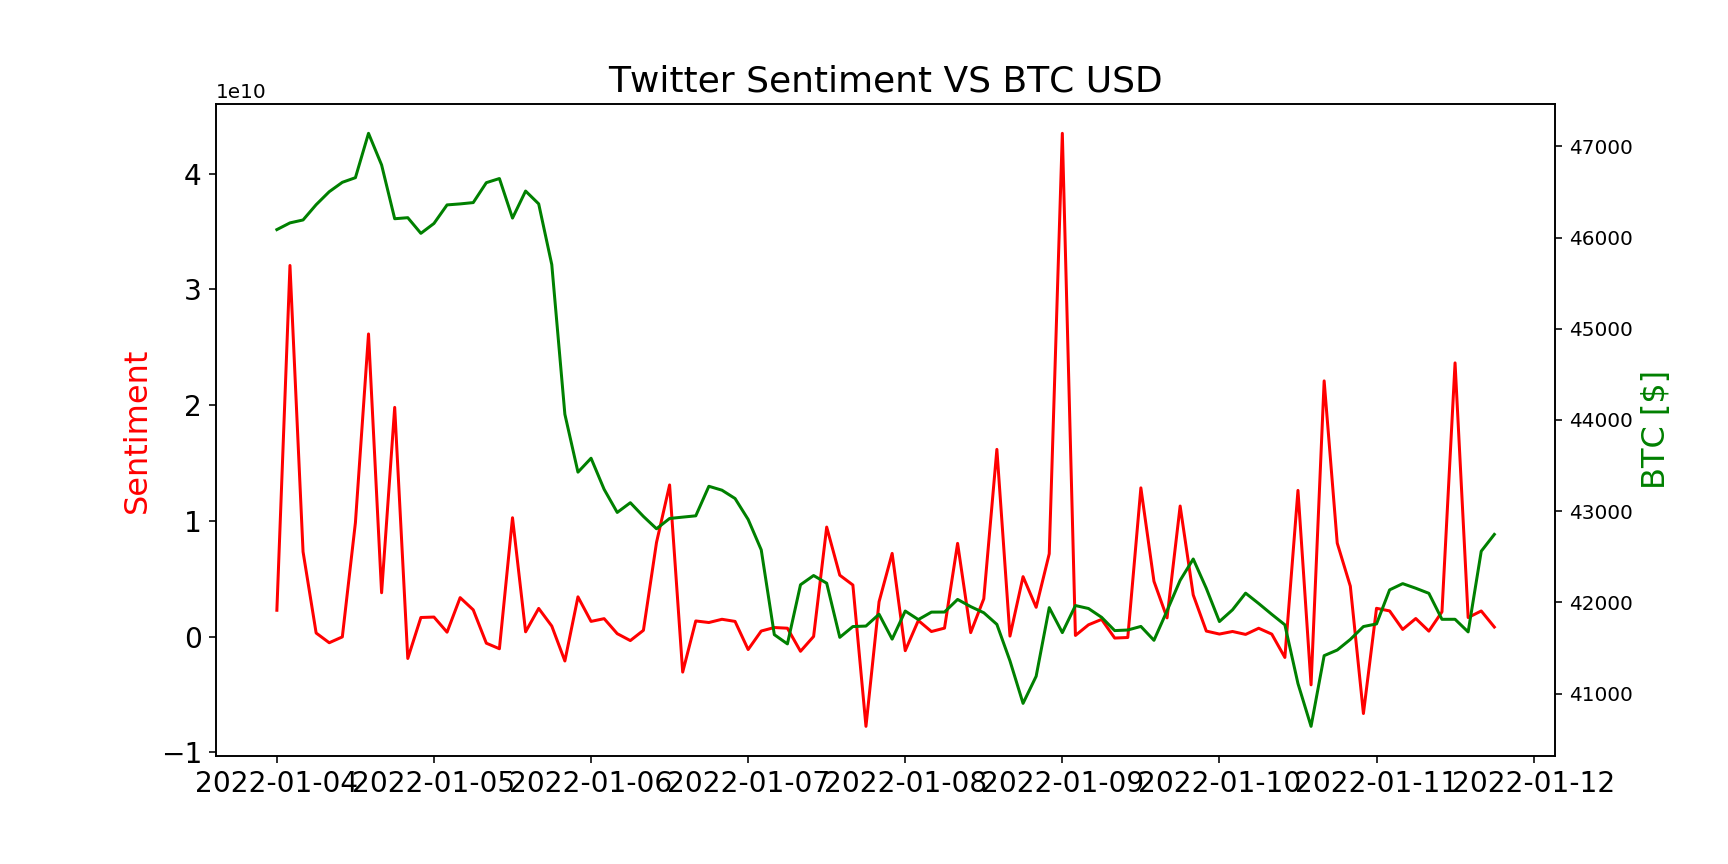

In [395]:
dashboard


In [342]:
dashboard.show()


Launching server at http://localhost:53144


In [ ]:
def build_dashboard():
     return pn.Column(title, tabs)

if __name__.startswith("bokeh"):
    # start with panel serve script.py
    dashboard = build_dashboard()
    dashboard.servable()
if __name__ == "__main__":
    # start with python script.py
    dashboard = build_dashboard()
    dashboard.show(port=5009)

In [ ]:
tweets_grouped

In [ ]:
import antonio_analysis.ipynb

In [ ]:
%run antonio_analysis.ipynb